In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
# 대출기간 맨 처음에 공백이 들어가있습니다.
train_df['대출기간'] = train_df['대출기간'].apply(lambda x: int(list(x.split(" "))[1])/12)
train_df['is_rent'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
train_df['is_mort'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
train_df['is_own'] = train_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
train_df['is_부채통합'] = train_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
train_df['is_주택개선'] = train_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
train_df['is_신용카드'] = train_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
train_df['is_그외목적'] = train_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드'] else 0)

# 0-1으로 수동으로 변환시킨 변수들도 우선 제거
train_df = train_df.drop(['ID', '주택소유상태', '대출목적'], axis = 1)

In [3]:
test_df['대출기간'] = test_df['대출기간'].apply(lambda x: int(list(x.split(" "))[1])/12)
test_df['is_rent'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'RENT' else 0)
test_df['is_mort'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'MORTGAGE' else 0)
test_df['is_own'] = test_df['주택소유상태'].apply(lambda x: 1 if x == 'OWN' else 0)
test_df['is_부채통합'] = test_df['대출목적'].apply(lambda x: 1 if x == '부채 통합' else 0)
test_df['is_주택개선'] = test_df['대출목적'].apply(lambda x: 1 if x in ['주택 개선', '주택'] else 0)
test_df['is_신용카드'] = test_df['대출목적'].apply(lambda x: 1 if x == '신용 카드' else 0)
test_df['is_그외목적'] = test_df['대출목적'].apply(lambda x: 1 if x not in ['부채 통합', '주택 개선', '신용 카드', '주택'] else 0)

# 0-1으로 수동으로 변환시킨 변수들도 우선 제거
test_df = test_df.drop(['ID', '주택소유상태', '대출목적'], axis = 1)

In [5]:
train_df_corr = train_df.copy()

In [6]:
# 고등급부터 저등급을 6~0으로 매기겠습니다. 수치형이되어야 관계를 보기 좋으니까요.
def get_grade_to_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

train_df_corr['grade'] = train_df_corr['대출등급'].apply(lambda x : get_grade_to_num(x))
train_df_corr = train_df_corr.drop(['대출등급'], axis = 1)

In [8]:
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(train_df_corr.corr(), annot = True, annot_kws={"size": 12})
plt.rc('axes', labelsize=36)
plt.show()

ValueError: could not convert string to float: '6 years'

In [9]:
train_df.head(5)

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,is_rent,is_mort,is_own,is_부채통합,is_주택개선,is_신용카드,is_그외목적
0,12480000,3.0,6 years,72000000,18.90,15,0,0,0.0,0.0,0.0,C,1,0,0,1,0,0,0
1,14400000,5.0,10+ years,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B,0,1,0,0,1,0,0
2,12000000,3.0,5 years,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A,0,1,0,1,0,0,0
3,14400000,3.0,8 years,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C,0,1,0,1,0,0,0
4,18000000,5.0,Unknown,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B,1,0,0,0,0,0,1


In [10]:
def work_year_check(s):
    if s in ['< 1 year', '<1 year', '< 1 years']:
        return '0'
    elif s in ['10+years', '10+ years']:
        return '10'
    elif s == 'Unknown':
        return '0'
    else:
        return str(s[0])

In [11]:
train_df['근로기간'] = train_df['근로기간'].apply(lambda x : int(work_year_check(x)))
test_df['근로기간'] = test_df['근로기간'].apply(lambda x : int(work_year_check(x)))

In [17]:

# 근로기간에서 'years'를 뺀 숫자만 남기는 함수
def extract_years(row):
    years_str = ''.join(filter(str.isdigit, row['근로기간']))
    return int(years_str) if years_str else None

# '근로기간' 컬럼의 값을 숫자로 변환
train_df_corr['근로기간'] = train_df_corr.apply(extract_years, axis=1)

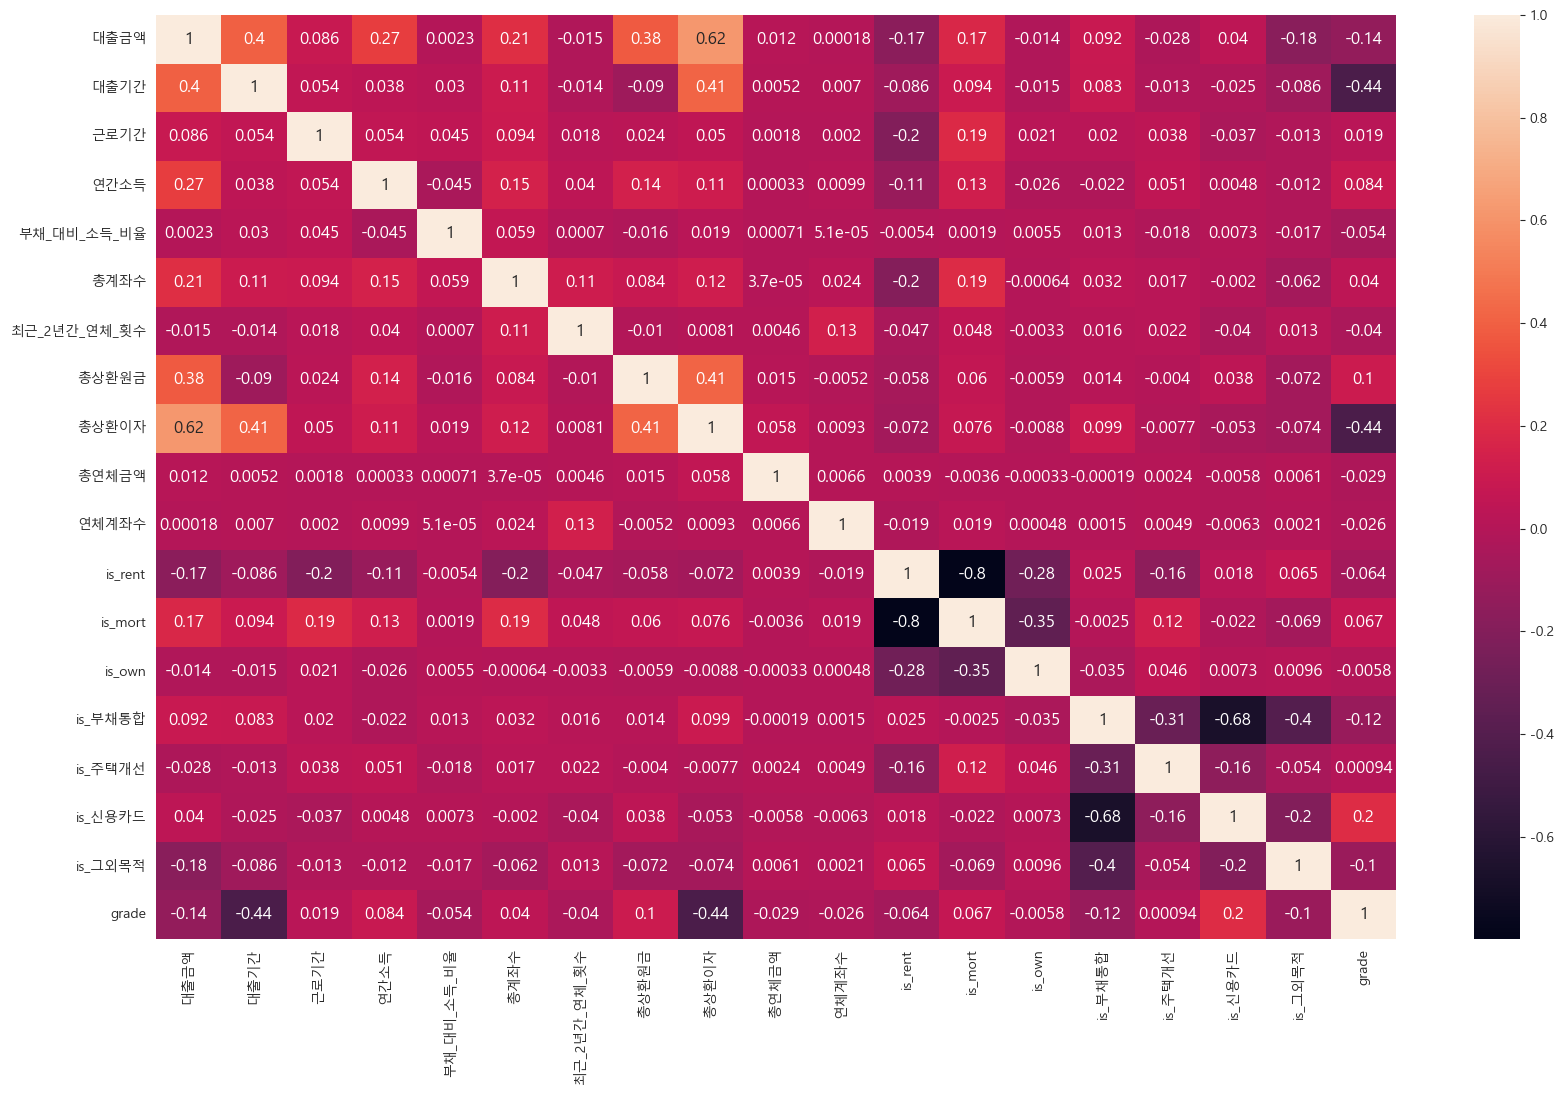

In [18]:
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(train_df_corr.corr(), annot = True, annot_kws={"size": 12})
plt.rc('axes', labelsize=36)
plt.show()

In [19]:
X = train_df.drop(['대출등급'], axis = 1)
y = train_df['대출등급']

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [20]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth = 7, random_state = 42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f1_score(pred, y_test, average = 'macro'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 72220, number of used features: 18
[LightGBM] [Info] Start training from score -1.747688
[LightGBM] [Info] Start training from score -1.206422
[LightGBM] [Info] Start training from score -1.248762
[LightGBM] [Info] Start training from score -1.975633
[LightGBM] [Info] Start training from score -2.572245
[LightGBM] [Info] Start training from score -3.897179
[LightGBM] [Info] Start training from score -5.434900
[LightGBM

In [21]:
# 정답 제출 작성용 코드
def get_answer_file(result):
    answer_df = pd.read_csv('sample_submission.csv')
    answer_df.columns = ['ID', '대출등급']
    answer_df['대출등급'] = result
    answer_df.to_csv('submission.csv', index = False,
                     encoding = 'utf-8-sig')

In [26]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# 클래스를 숫자로 변환
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# XGBClassifier 모델 정의
model = XGBClassifier(max_depth=8, random_state=42, objective='multi:softmax', eval_metric='logloss', num_class=len(le.classes_))

# 모델 학습
model.fit(X_train, y_train_encoded)

# 예측
pred_encoded = model.predict(X_test)

# 예측 결과를 다시 문자열로 변환
pred = le.inverse_transform(pred_encoded)

# F1 스코어 계산
f1 = f1_score(y_test, pred, average='macro')
print(f"F1 Score: {f1}")


F1 Score: 0.7928287805971677


In [27]:
X['상환비율'] = X['총상환원금']/X['대출금액'] * 100
X['원금대비상환이자비율'] = X['총상환이자']/X['대출금액'] * 100
test_df['상환비율'] = test_df['총상환원금']/test_df['대출금액'] * 100
test_df['원금대비상환이자비율'] = test_df['총상환이자']/test_df['대출금액'] * 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

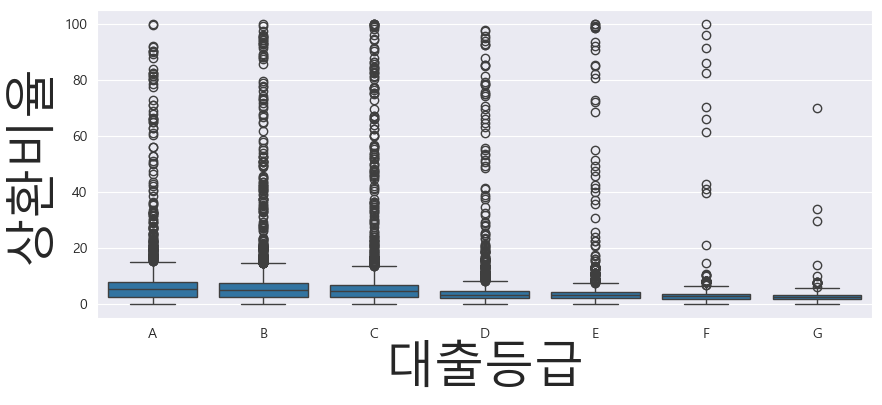

In [30]:
# 위에서는 훈련 셋에다 만들었습니다. 따라서 원본 데이터에 다시 공식을 적용하여 시각화.
train_df['상환비율'] = train_df['총상환원금']/train_df['대출금액'] * 100
train_df['원금대비상환이자비율'] = train_df['총상환이자']/train_df['대출금액'] * 100

plt.rcParams["figure.figsize"] = (10,4)
sns.boxplot(x = '대출등급', y = '상환비율', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

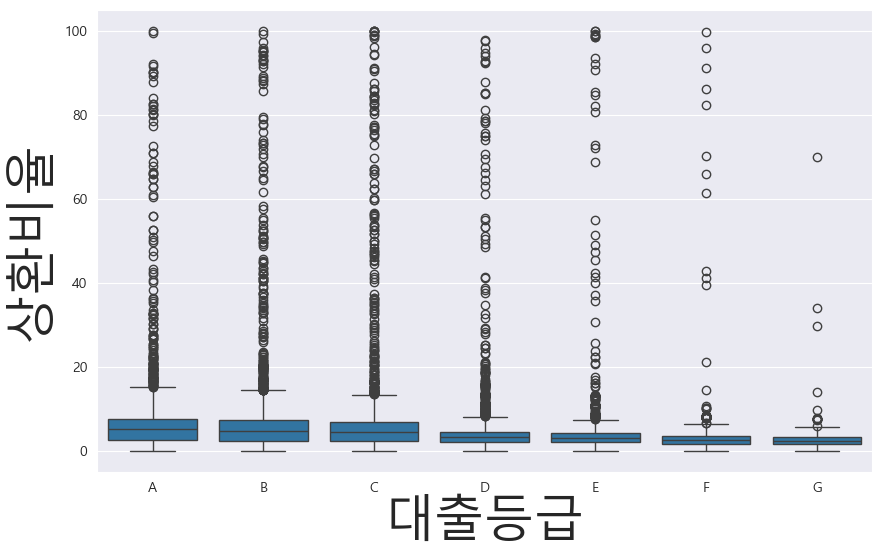

In [31]:
# 위에서는 훈련 셋에다 만들었습니다. 따라서 원본 데이터에 다시 공식을 적용하여 시각화.
train_df['상환비율'] = train_df['총상환원금']/train_df['대출금액'] * 100
train_df['원금대비상환이자비율'] = train_df['총상환이자']/train_df['대출금액'] * 100

plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = '대출등급', y = '상환비율', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

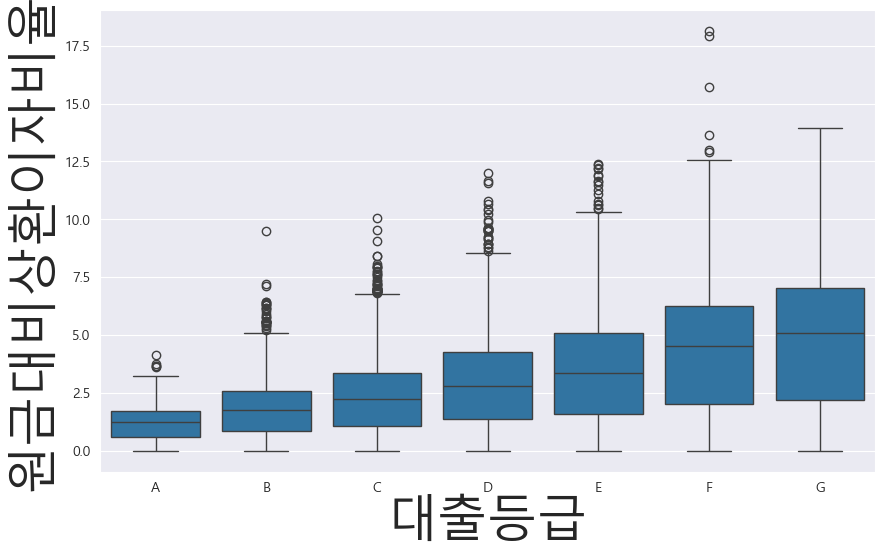

In [36]:
plt.rcParams["figure.figsize"] = (10,6)
sns.boxplot(x = '대출등급', y = '원금대비상환이자비율', data = train_df,
            order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [40]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# 클래스를 숫자로 변환
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# XGBClassifier 모델 정의
model = XGBClassifier(max_depth=8, random_state=42, objective='multi:softmax', eval_metric='logloss', num_class=len(le.classes_))

# 모델 학습
model.fit(X_train, y_train_encoded)

# 예측
pred_encoded = model.predict(X_test)

# 예측 결과를 다시 문자열로 변환
pred = le.inverse_transform(pred_encoded)

# F1 스코어 계산
f1 = f1_score(y_test, pred, average='macro')
print(f"F1 Score: {f1}")

F1 Score: 0.9112778896471535


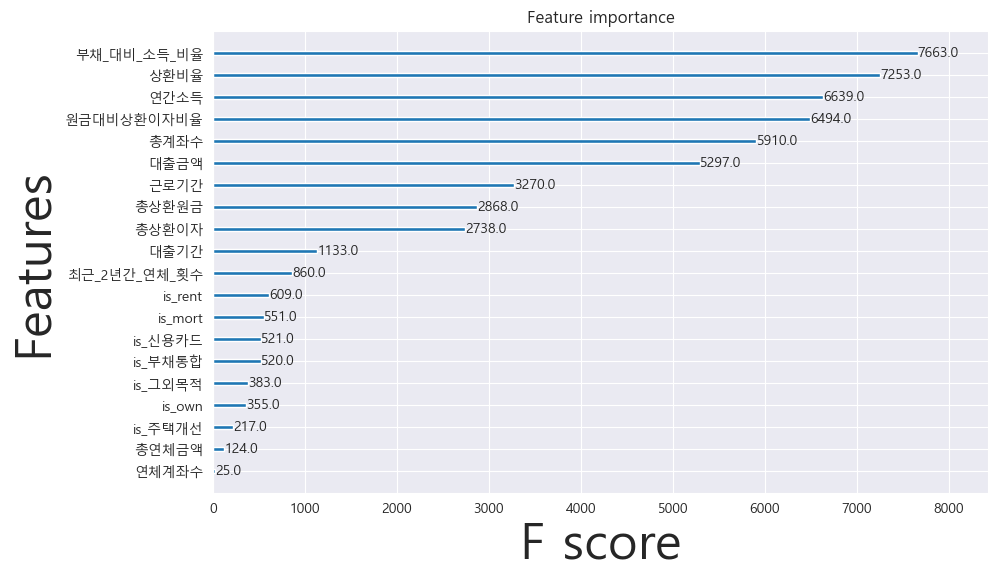

In [41]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
plot_importance(model)
plt.show()